# Python Numba or NumPy: which one to choose?

This notebook shows an example of how to use Numpy and Numba to construct and maniplulayt the data vectors. 

## Creating a ten-million row list

In [1]:
# We need to import the random package to fillup the array with some random values.

import random
# Will use the time package to plot the runtime of different task
import time
array = []
import matplotlib.pyplot as plt 

In [2]:
def build_list(size):
    for i in range(0,size):
        val = random.randint(0,1000)
        array.append(val)
    return array

In [3]:
%%time 
array = build_list(10000000)

CPU times: user 9.77 s, sys: 89.2 ms, total: 9.86 s
Wall time: 9.87 s


In [4]:
print('The size of the newly created list: ', len(array))

The size of the newly created list:  10000000


In [5]:
def find_a_value(key):
    freq = 0 
    for value in array: 
        if value == key: 
            freq = freq + 1
    return freq

In [6]:
%%time
key = 999
print(find_a_value(key))

10118
CPU times: user 229 ms, sys: 3.72 ms, total: 233 ms
Wall time: 231 ms


## Creating a NumPy array

In [7]:
# Let's load the numpy library
import numpy as np

In [8]:
np_array = np.array(array)
print('The size of the numpy array: ', np_array.shape)

The size of the numpy array:  (10000000,)


In [9]:
%%time
result = np.where(np_array == key)

CPU times: user 9.65 ms, sys: 2.85 ms, total: 12.5 ms
Wall time: 11.1 ms


In [10]:
print(len(result[0]))

10118


## Applying an operation on the array entries 

In [11]:
def apply_operation_list(array): 
    # We need to build an X vector from the original array
    # The math operations in this function represents some random logic.
    x_array = [] 
    for array_v in array: 
        x_array.append(array_v * 2)
    
    # Building the Y vector
    y_array = []
    for array_v, x_array_v in zip(array, x_array): 
        y_array.append(array_v + x_array_v)
    
    # Building the Z vector
    z_array = []
    for array_v, x_array_v, y_array_v in zip(array, x_array, y_array):
        if x_array_v == 0: 
            z_array.append(0)
        else: 
            z_array.append((array_v - x_array_v ) + y_array_v)
    
    return x_array, y_array, z_array

In [12]:
%%time
x_array, y_array, z_array = apply_operation_list(array)

CPU times: user 2.97 s, sys: 233 ms, total: 3.2 s
Wall time: 3.2 s


In [13]:
# Let's concatenate the columns in one array 
array_l = list(zip(x_array, y_array, z_array))

In [14]:
def apply_operation_numpy(array): 
    # We need to build an X vector from the original array
    # The math operations in this function represents some random logic.
    x_array = array * 2
    
    # Building the Y vector
    y_array = array + x_array
    
    # Building the Z vector
    z_array = ( array - x_array ) + y_array
    
    return x_array, y_array, z_array

In [15]:
%%time
x_array_np, y_array_np, z_array_np = apply_operation_numpy(np_array)

CPU times: user 64.6 ms, sys: 40.1 ms, total: 105 ms
Wall time: 104 ms


In [16]:
# Let's concatenate the columns in one array 
array_np = np.column_stack([x_array_np, y_array_np, z_array_np])

In [17]:
# Loading the Numba package
# Jit tells numba the function we want to compile
from numba import jit

In [18]:
@jit
def apply_operation_numba(array): 
    # We need to build an X vector from the original array
    # The math operations in this function represents some random logic.
    x_array = array * 2
    
    # Building the Y vector
    y_array = array + x_array
    
    # Building the Z vector
    z_array = ( array - x_array ) + y_array
    
    return x_array, y_array, z_array

In [19]:
%%time
x_array_nb, y_array_nb, z_array_nb = apply_operation_numpy(np_array)

CPU times: user 64.5 ms, sys: 40.6 ms, total: 105 ms
Wall time: 104 ms


In [190]:
# Let's concatenate the columns in one array similarly
array_nb = np.column_stack([x_array_np, y_array_np, z_array_np])

# Computing Value Frequency

In [ ]:
### Using a list and a dictionary

In [ ]:
%time
d = {x:x_array.count(x) for x in x_array}

In [192]:
%%time
x_elements_np, x_counts_np = np.unique(x_array_np, return_counts=True)

CPU times: user 1.55 s, sys: 18.2 ms, total: 1.57 s
Wall time: 388 ms


In [50]:
time_list = [0.0005497932434082031,    #   10,000
             0.003844022750854492,     #  100,000
             0.038639068603515625,     # 1000,000
             0.2835867404937744,       # 10,000,000
             2.5258989334106445,       # 100,000,000
             4.757065773010254]        # 1000,000,000
time_numpy = [0.2504310607910156,
             0.2957942485809326,
             0.3016660213470459,
             0.27858901023864746,
             0.42589712142944336,
             2.0494470596313477]
time_numpy2 = [0.08970904350280762,
             0.05908989906311035,
             0.07226109504699707,
             0.18674707412719727,
             1.2738947868347168,
             32.62264084815979]
time_numba2= [0.1367931365966797, 0.1189723014831543, 0.0751180648803711,
             0.2380678653717041,
             1.3935070037841797,
             25.82284688949585]

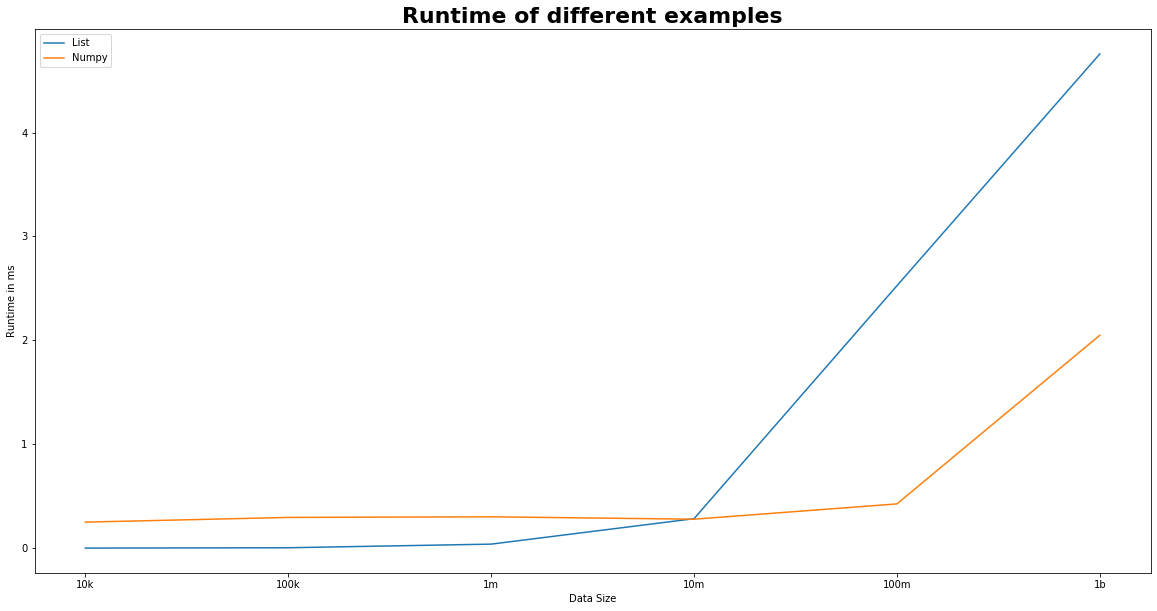

In [51]:
plt.figure(figsize=(20,10))
examples = ['10k', '100k', '1m', '10m', '100m', '1b']
plt.plot(examples, time_list, label="List")
plt.plot(examples, time_numpy, label="Numpy")
plt.legend(loc='upper left')
plt.title("Runtime of different examples", fontsize=22, fontweight='bold')
plt.ylabel("Runtime in ms")
plt.xlabel("Data Size")
plt.show()

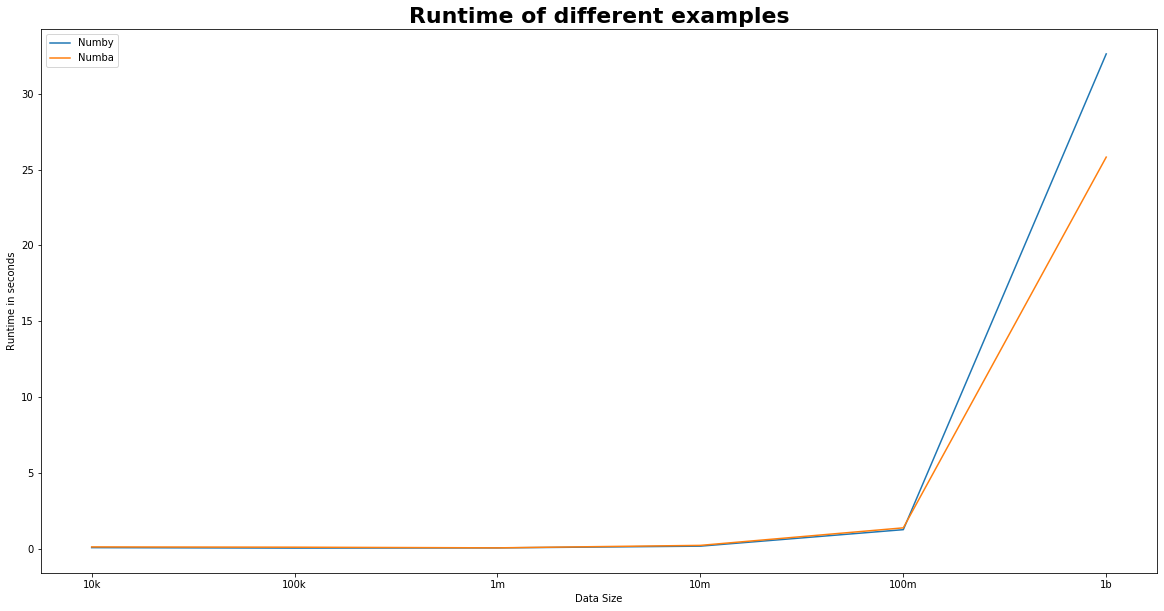

In [52]:
plt.figure(figsize=(20,10))
examples = ['10k', '100k', '1m', '10m', '100m', '1b']
plt.plot(examples, time_numpy2, label="Numby")
plt.plot(examples, time_numba2, label="Numba")
plt.legend(loc='upper left')
plt.title("Runtime of different examples", fontsize=22, fontweight='bold')
plt.ylabel("Runtime in seconds")
plt.xlabel("Data Size")
plt.show()